In [1]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
from timeit import default_timer as timer
import os
import altair as alt


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
path = os.path.join(os.path.expanduser('~'), 'mcs/study/code/bioinfo/data/analysis/attila_cdr/Final_wHAIPI009594-32_1aafreq.csv')
cdr = pd.read_csv(path).sort_values(by='quantity', ascending=False)

In [4]:
cdr.head()

,cdr3,quantity,length,MW,AV,IP,flex,gravy,SSF_Helix,SSF_Turn,...,n_T,n_V,n_W,n_Y,aliphatic,aromatic,neutral,positive,negative,invalid
0,FIVESK,83577,6,721.8413,0.1667,6.0014,0.7368,0.5500,0.5000,0.1667,...,0,1,0,0,2,1,1,1,1,0
1,DLGIPDDY,57780,8,906.9324,0.1250,3.4228,0.7723,-0.6875,0.3750,0.2500,...,0,0,0,1,4,1,0,0,3,0
2,EMWGPEY,30588,7,910.9889,0.2857,3.7950,0.7594,-1.3286,0.2857,0.2857,...,0,0,1,1,3,2,0,0,2,0
3,EMWGPDY,18892,7,896.9623,0.2857,3.6660,0.7563,-1.3286,0.2857,0.2857,...,0,0,1,1,3,2,0,0,2,0
4,DLHWGAADY,18675,9,1047.0772,0.2222,4.1967,0.7286,-0.6000,0.3333,0.1111,...,0,0,1,1,4,2,0,1,2,0


In [5]:
c = cdr.iloc[:50]

In [6]:
c.head()

,cdr3,quantity,length,MW,AV,IP,flex,gravy,SSF_Helix,SSF_Turn,...,n_T,n_V,n_W,n_Y,aliphatic,aromatic,neutral,positive,negative,invalid
0,FIVESK,83577,6,721.8413,0.1667,6.0014,0.7368,0.5500,0.5000,0.1667,...,0,1,0,0,2,1,1,1,1,0
1,DLGIPDDY,57780,8,906.9324,0.1250,3.4228,0.7723,-0.6875,0.3750,0.2500,...,0,0,0,1,4,1,0,0,3,0
2,EMWGPEY,30588,7,910.9889,0.2857,3.7950,0.7594,-1.3286,0.2857,0.2857,...,0,0,1,1,3,2,0,0,2,0
3,EMWGPDY,18892,7,896.9623,0.2857,3.6660,0.7563,-1.3286,0.2857,0.2857,...,0,0,1,1,3,2,0,0,2,0
4,DLHWGAADY,18675,9,1047.0772,0.2222,4.1967,0.7286,-0.6000,0.3333,0.1111,...,0,0,1,1,4,2,0,1,2,0


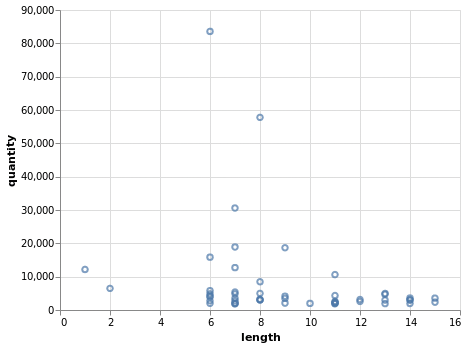

In [7]:
alt.Chart(c).mark_point().encode(
    x=alt.X('length'),
    y=alt.Y('quantity')
).interactive()

In [10]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('grey')),
).add_selection(
    brush
).properties(
    width=400,
    height=400
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
).properties(
    width=860,
    height=100
)

all = alt.vconcat(alt.hconcat(base.encode(x='Horsepower'), base.encode(x='Acceleration')), bars)

all.save('cars.html')

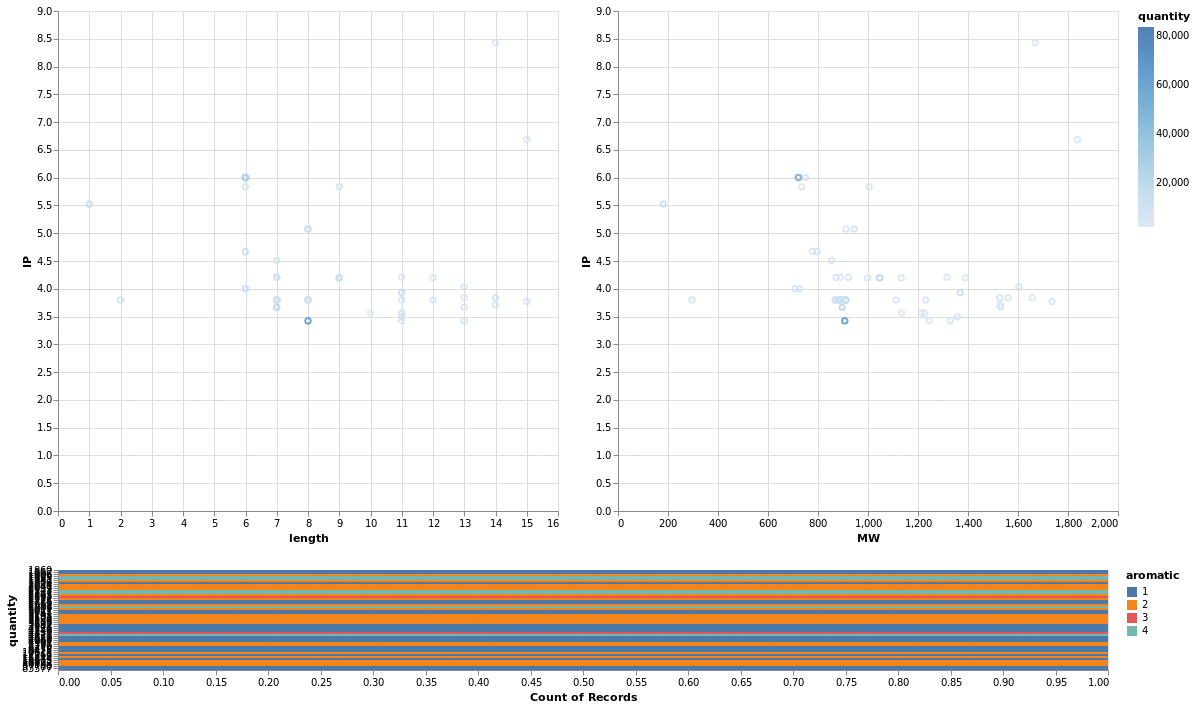

In [9]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(c).mark_point().encode(
    y='IP',
    color=alt.condition(brush, 'quantity', alt.ColorValue('grey')),
).add_selection(
    brush
).properties(
    width=500,
    height=500
)

bars = alt.Chart(c).mark_bar().encode(
    y='quantity:N',
    color='aromatic:N',
    x='count(length):Q'
).transform_filter(
    brush
).properties(
    width=1050,
    height=100
)

alt.vconcat(alt.hconcat(base.encode(x='length'), base.encode(x='MW')), bars)